## Linear regresion using normal equation and gradient descent

In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

## the ideal  model is y=4+3x

In [3]:
X=2*np.random.rand(100,1)
y=4 + 3*X + np.random.randn(100,1)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


### X , y : column vector

In [4]:
X[:5]

array([[ 0.74908024],
       [ 1.90142861],
       [ 1.46398788],
       [ 1.19731697],
       [ 0.31203728]])

In [5]:
y[:5]

array([[ 6.33428778],
       [ 9.40527849],
       [ 8.48372443],
       [ 5.60438199],
       [ 4.71643995]])

## Let's see the input versus output

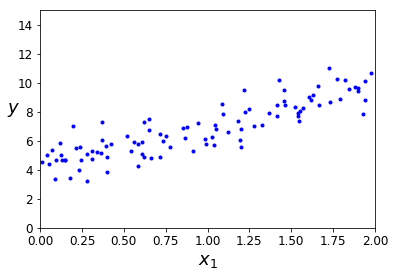

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## add x0=1 to each instance
## total 100 instances 

In [7]:
X_b=np.c_[np.ones((100,1)), X]   # add x0=1 to each instance
print(X_b.shape)
print(type(X_b))

(100, 2)
<class 'numpy.ndarray'>


In [8]:
X[:5,:]

array([[ 0.74908024],
       [ 1.90142861],
       [ 1.46398788],
       [ 1.19731697],
       [ 0.31203728]])

In [9]:
X_b[:5,:]

array([[ 1.        ,  0.74908024],
       [ 1.        ,  1.90142861],
       [ 1.        ,  1.46398788],
       [ 1.        ,  1.19731697],
       [ 1.        ,  0.31203728]])

## numpy.ndarray

## class numpy.ndarray(shape, dtype=float, buffer=None, offset=0, strides=None, order=None)
## https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.html

In [10]:
## get the  attribute T , its transpose
X_b[:5,:].T

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.74908024,  1.90142861,  1.46398788,  1.19731697,  0.31203728]])

In [11]:
print(type(X_b[:5,:].T))

<class 'numpy.ndarray'>


## Normal equation :
## From X_b and y, we can derive theta_best( theta_0 is the bias) 
## First let's use numpy's linear algebra to find the solution of normal equation

## numpy.linalg.inv(a)
## Compute the (multiplicative) inverse of a matrix.
## Given a square matrix a, return the matrix ainv satisfying dot(a, ainv) = dot(ainv, a) = eye(a.shape[0]).
## https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.inv.htm

In [12]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
print(theta_best)

[[ 4.21509616]
 [ 2.77011339]]


## test with input:  0 and 2

In [14]:
X_new=np.array([[0],[2]])

In [15]:
print(X_new)

[[0]
 [2]]


In [16]:
X_new_b=np.c_[np.ones((2,1)),X_new] # add x0=1 to each instance

In [17]:
X_new_b

array([[ 1.,  0.],
       [ 1.,  2.]])

In [18]:
y_pred=X_new_b.dot(theta_best)

In [19]:
y_pred

array([[ 4.21509616],
       [ 9.75532293]])

## red line from the above two points y_pred

(100, 1)
(100, 2)
(100, 1)


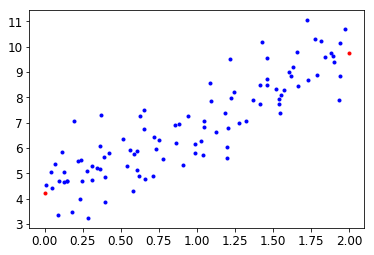

In [20]:
print(X.shape)
print(X_b.shape)
print(y.shape)
plt.plot(X,y,"b.")
plt.plot(X_new,y_pred,"r.")
#plt.plot(X_new,y_pred,"r-")
plt.show()

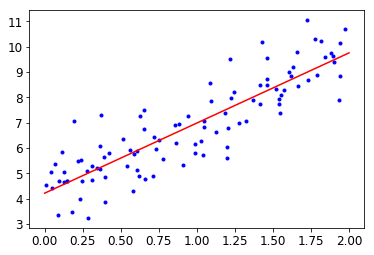

In [21]:
plt.plot(X,y,"b.")
#plt.plot(X_new,y_pred,"r.")
plt.plot(X_new,y_pred,"r-")
plt.show()

## now let's try Scikit-Learn, ordinary least square

### class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [25]:
print(lin_reg.fit(X, y))
print(type(lin_reg.fit(X, y)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>


In [26]:
theta_best

array([[ 4.21509616],
       [ 2.77011339]])

In [27]:
lin_reg.intercept_, lin_reg.coef_

(array([ 4.21509616]), array([[ 2.77011339]]))

In [28]:
X_new

array([[0],
       [2]])

In [29]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

## now let's try Scikit-Learn, stochastic gradient descent

In [32]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50,eta0=0.1)

In [34]:
print(y.shape)
print(y.ravel().shape)

(100, 1)
(100,)


In [35]:
y[:5]

array([[ 6.33428778],
       [ 9.40527849],
       [ 8.48372443],
       [ 5.60438199],
       [ 4.71643995]])

In [36]:
y.ravel()[:5]

array([ 6.33428778,  9.40527849,  8.48372443,  5.60438199,  4.71643995])

In [33]:
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [37]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.20146419]), array([ 2.75756901]))

## now let's try tensorflow, using normal equation

In [38]:
import tensorflow as tf
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [30]:
print(X.shape)
print(X_b.shape)
print(y.shape)

(100, 1)
(100, 2)
(100, 1)


## tf.constant:  https://www.tensorflow.org/api_docs/python/tf/constant

In [36]:
print(type(tf.constant))

<class 'function'>


In [37]:
print(type(tf.transpose))

<class 'function'>


In [31]:
XX = tf.constant(X_b, dtype=tf.float32, name="XX")
yy = tf.constant(y, dtype=tf.float32, name="yy")
XXT = tf.transpose(XX)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XXT, XX)), XXT), yy)

with tf.Session() as sess:
    theta_value = theta.eval()

In [32]:
theta_value

array([[4.2150936],
       [2.7701142]], dtype=float32)

## now let's try tensorflow, using batch gradient descent

In [33]:
m,n=X.shape
print(m,n)

100 1


In [34]:
n_epochs = 1000
learning_rate = 0.01

XXX = tf.constant(X_b, dtype=tf.float32, name="XXX")
yyy = tf.constant(y, dtype=tf.float32, name="yyy")
theta = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(XXX, theta, name="predictions")
error = y_pred - yyy
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(XXX), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 34.007614
Epoch 100 MSE = 0.88080275
Epoch 200 MSE = 0.8405505
Epoch 300 MSE = 0.8237915
Epoch 400 MSE = 0.81530195
Epoch 500 MSE = 0.8110009
Epoch 600 MSE = 0.80882204
Epoch 700 MSE = 0.80771804
Epoch 800 MSE = 0.8071587
Epoch 900 MSE = 0.8068756


In [35]:
print(best_theta)

[[4.1930046]
 [2.7896192]]
